In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from IPython.display import Image
import copy
import scipy as stats
import seaborn as sns


In [3]:
# read files from data folder 
CSV_PATH_PALM = os.path.join('..', 'data','palm_oil_production.csv')
CSV_PATH_FOREST = os.path.join('..', 'data','change_forest.csv')
CSV_PATH_LAND = os.path.join('..', 'data','land_use_palm.csv')


In [4]:

COLS_TO_USE = ['Entity', 'Code', 
              'Year', 'Tonnes']

df_palm = pd.read_csv(CSV_PATH_PALM, usecols=COLS_TO_USE)
df_forest = pd.read_csv(CSV_PATH_FOREST)
df_land = pd.read_csv(CSV_PATH_LAND)


In [5]:
# simplify column names of dataframe 
df_forest.rename(columns={"Annual net change in forest area": 
                        "Forest_Change"}, inplace=True)

df_land.rename(columns={"Crops - Oil palm fruit - 254 - Area harvested - 5312 - ha": 
                                "Palm_Land_Use"}, inplace=True)


In [6]:
#Intro image
print("Palm Crop")
Image(url= "../img/palm_life.png", width=500, height=700)

Palm Crop


In [7]:

# data cleaning
# check for null values
df_palm.isnull().sum()
df_forest.isnull().sum()
df_land.isnull().sum()


Entity             0
Code             934
Year               0
Palm_Land_Use      0
dtype: int64

In [8]:

# fill out null values
df1 = df_palm.fillna(value = 'NOT COUNTRY')
df2 = df_forest.fillna(value = 'NOT COUNTRY')
df3 = df_land.fillna(value = 'NOT COUNTRY')

In [9]:


# New dataframes that contain only countries
Code = ['NOT COUNTRY', 'OWID_WRL']

indexNames1 = df1[df1['Code'].isin(Code)].index
df_palm_country = df1.drop(indexNames1)

indexNames2 = df2[df2['Code'].isin(Code)].index
df_forest_country = df2.drop(indexNames2)

indexNames3 = df3[df3['Code'].isin(Code)].index
df_land_countrt = df3.drop(indexNames3)

In [10]:
df_forest_country

,Entity,Code,Year,Forest_Change
0,Algeria,DZA,1990,-8800.0
1,Algeria,DZA,2000,33900.0
2,Algeria,DZA,2010,7600.0
3,Algeria,DZA,2015,-1400.0
4,Argentina,ARG,1990,-182600.0
...,...,...,...,...
470,Zambia,ZMB,2015,-188210.0
471,Zimbabwe,ZWE,1990,-46070.0
472,Zimbabwe,ZWE,2000,-46070.0
473,Zimbabwe,ZWE,2010,-46070.0


In [11]:
# drop data before 1970
df_palm_country = df_palm_country[df_palm_country['Year'] >= 1975]  

In [12]:
df_palm_country['Tonnes'].mean()

577647.525848564

In [13]:
df_palm_country['Tonnes'].max()

40567230

In [15]:
# Find the countries produce the most palm oil
df_palm_country_top = df_palm_country[df_palm_country['Tonnes'] 
                                        > df_palm_country['Tonnes'].mean()]
Top_Production_Country = df_palm_country_top.Entity.unique()
Top_Production_Country

array(['Colombia', 'Ecuador', 'Guatemala', 'Honduras', 'Indonesia',
       'Malaysia', 'Melanesia', 'Nigeria', 'Papua New Guinea', 'Thailand'],
      dtype=object)

In [16]:
print("The following list of countries " 
    "are the top 10 producers of palm oil in the world:\n" )
print (Top_Production_Country)

The following list of countries are the top 10 producers of palm oil in the world:

['Colombia' 'Ecuador' 'Guatemala' 'Honduras' 'Indonesia' 'Malaysia'
 'Melanesia' 'Nigeria' 'Papua New Guinea' 'Thailand']


In [17]:
print("Indonesia")
Image(url= "../img/indo.png", width=500, height=700)

print("In the past two decades, more than 25 million hectares of tree cover has been lost", 
      "much of it logged or burned to plant oil palms.")

Indonesia
In the past two decades, more than 25 million hectares of tree cover has been lost much of it logged or burned to plant oil palms.


In [18]:


print( " Worse still, Indonesia is the world’s biggest exporter of global warming⁠—power station coal.")

 Worse still, Indonesia is the world’s biggest exporter of global warming⁠—power station coal.


In [19]:
Image(url= "../img/forest.png", width=500, height=700)

In [20]:
Image(url= "../img/borneo.gif", width=500, height=700)

In [21]:
#print("The countries that produce the most palm oil are:\n")
#i= 1
#for country in Top_Production_Country:
#    print(i, ". ", country)
#    i += 1

In [22]:
# entity_counts = df_palm_countrty['Entity'].value_counts()
# s = entity_counts[entity_counts > entity_counts.mean()]

# s

<AxesSubplot:xlabel='Year'>

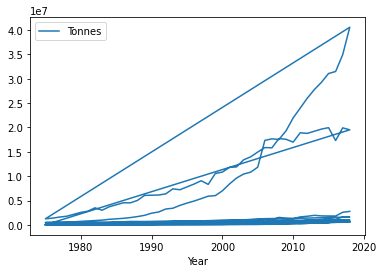

In [23]:
df_palm_country.loc[df_palm_country['Entity'].isin(Top_Production_Country), :].plot(x='Year',legend=True)

In [24]:
combined_sorted = df_palm_country.sort_values(by="Tonnes", ascending=False)



In [25]:
combined_sorted.set_index("Entity", inplace=True)
ranking = combined_sorted.head(15)

In [26]:
df_palm_plot = df_palm_country.loc[df_palm_country['Entity'].isin(Top_Production_Country), :]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


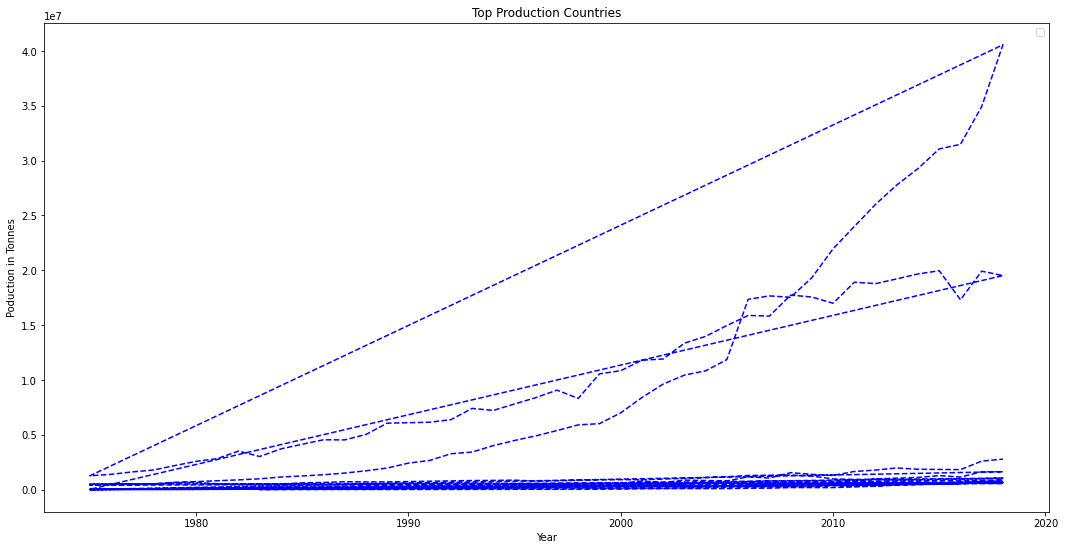

In [27]:

fig, axes = plt.subplots(figsize=(18,9))

axes.set_title('Top Production Countries')

axes.set_xlabel('Year')
axes.set_ylabel('Poduction in Tonnes')

axes.plot((df_palm_plot['Year']),df_palm_plot['Tonnes'] , 'b--')
#axes.plot((df4['Year']),df4['Tonnes'], '--c', label = s.index[1] )
#axes.plot((df5['Year']),df5['Tonnes'], ':r' , label = s.index[-6] )

axes.legend()

In [102]:
dict_of_df_palm = {}
for country in Top_Production_Country:

    key_name = 'df_plot_'+str(country)    

    dict_of_df_palm[key_name] = copy.deepcopy(
        df_palm_country.loc[df_palm_country['Entity']==country])
 



In [103]:
dict_of_df_palm

{'df_plot_Colombia':        Entity Code  Year   Tonnes
 683  Colombia  COL  1961     1700
 684  Colombia  COL  1962     1950
 685  Colombia  COL  1963     2100
 686  Colombia  COL  1964     2200
 687  Colombia  COL  1965     2200
 688  Colombia  COL  1966     2800
 689  Colombia  COL  1967    11100
 690  Colombia  COL  1968    13400
 691  Colombia  COL  1969    17700
 692  Colombia  COL  1970    26900
 693  Colombia  COL  1971    36200
 694  Colombia  COL  1972    41400
 695  Colombia  COL  1973    44000
 696  Colombia  COL  1974    50800
 697  Colombia  COL  1975    39200
 698  Colombia  COL  1976    38940
 699  Colombia  COL  1977    48100
 700  Colombia  COL  1978    48800
 701  Colombia  COL  1979    61800
 702  Colombia  COL  1980    69800
 703  Colombia  COL  1981    79900
 704  Colombia  COL  1982    85200
 705  Colombia  COL  1983   101900
 706  Colombia  COL  1984   118628
 707  Colombia  COL  1985   125250
 708  Colombia  COL  1986   140000
 709  Colombia  COL  1987   147000


In [104]:
sns.set_style('whitegrid')
# for df in dict_of_df:
 #   print( dict_of_df[df] )

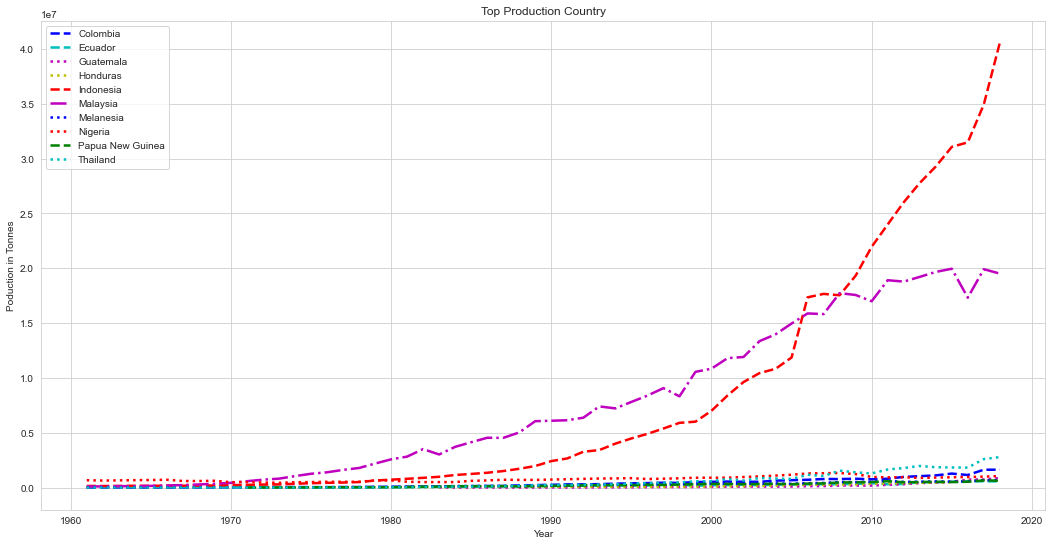

In [294]:
# iterate through the dataframe dictionary to plot
ls_of_style = ['b--', '--c', ':m', ':y', '--r',
                 '-.m', ':b', ':r', '--g', ':c']
sns.set_style('whitegrid')
fig, axes = plt.subplots(figsize=(18,9))
axes.set_title('Top Production Country')
axes.set_xlabel('Year')
axes.set_ylabel('Poduction in Tonnes')
axes.set
i = 0
for df in dict_of_df_palm:
    axes.plot((dict_of_df_palm[df]['Year']),dict_of_df_palm[df]['Tonnes'] , ls_of_style[i], 
            label = Top_Production_Country[i], linewidth=2.5)
    i += 1
axes.legend()

In [240]:
forest_country = ['Russia', 'China', 'Indonesia', 'Brazil', 'Austrlia','Myanmar']

In [241]:
dict_of_df = {}
for country in forest_country:

    key_name = 'df_plot_'+str(country)    

    dict_of_df[key_name] = copy.deepcopy(
        df_forest_country.loc[df_forest_country['Entity']==country])
 



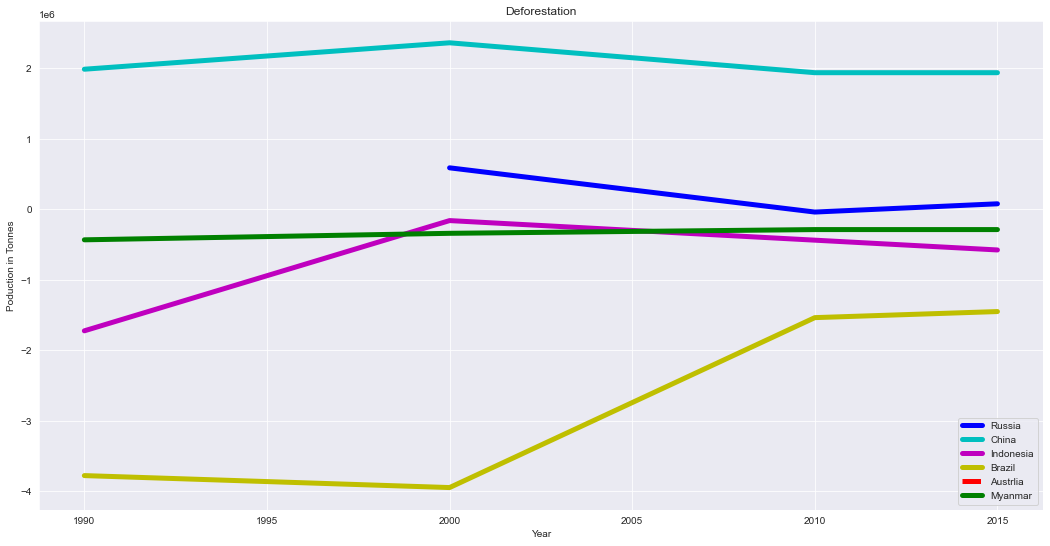

In [245]:
# iterate through the dataframe dictionary to plot
ls_of_style = ['b-', '-c', '-m', '-y', '--r',
                 '-g', ':b', ':r', '--g', ':c']
sns.set_style('darkgrid')
fig, axes = plt.subplots(figsize=(18,9))
axes.set_title('Deforestation')
axes.set_xlabel('Year')
axes.set_ylabel('Poduction in Tonnes')
#axes.set_fillstyle('full')
axes.set
i = 0
for df in dict_of_df:
    axes.plot((dict_of_df[df]['Year']),dict_of_df[df]['Forest_Change'] , ls_of_style[i],
              linewidth=5,
#              fillstyle= 'bottom',
            label = forest_country[i])
    i += 1
axes.legend()

In [70]:
fig.savefig('forest_plt.png')

In [35]:
indexNames1 = df1[df1['Code'].isin(Code)].index
df_palm_country = df1.drop(indexNames1)

In [44]:
df_palm.tail()

,Entity,Code,Year,Tonnes
3463,World,OWID_WRL,2014,57260155
3464,World,OWID_WRL,2015,59800434
3465,World,OWID_WRL,2016,58156889
3466,World,OWID_WRL,2017,65860608
3467,World,OWID_WRL,2018,71453193


In [53]:
df_palm_world = df_palm.loc[df_palm['Entity']=='World']
df_palm_world.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 3410 to 3467
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Entity  58 non-null     object
 1   Code    58 non-null     object
 2   Year    58 non-null     int64 
 3   Tonnes  58 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 2.3+ KB


In [85]:
dict_of_df = {}
for country in Top_Production_Country:

    key_name = 'df_plot_'+str(country)    

    dict_of_df[key_name] = copy.deepcopy(
        df_palm_country.loc[df_palm_country['Entity']==country])
 



In [275]:
Malaysia_2018 = (dict_of_df_palm['df_plot_Malaysia'].loc[dict_of_df_palm['df_plot_Malaysia']['Year']==2018]['Tonnes']).values[0]
Indonesia_2018 = (dict_of_df_palm['df_plot_Indonesia'].loc[dict_of_df_palm['df_plot_Indonesia']['Year']==2018]['Tonnes']).values[0]
World_2018 = ((df_palm_world.loc[df_palm_world['Year']==2018]['Tonnes']).values[0] - Malaysia_2018 - Indonesia_2018)

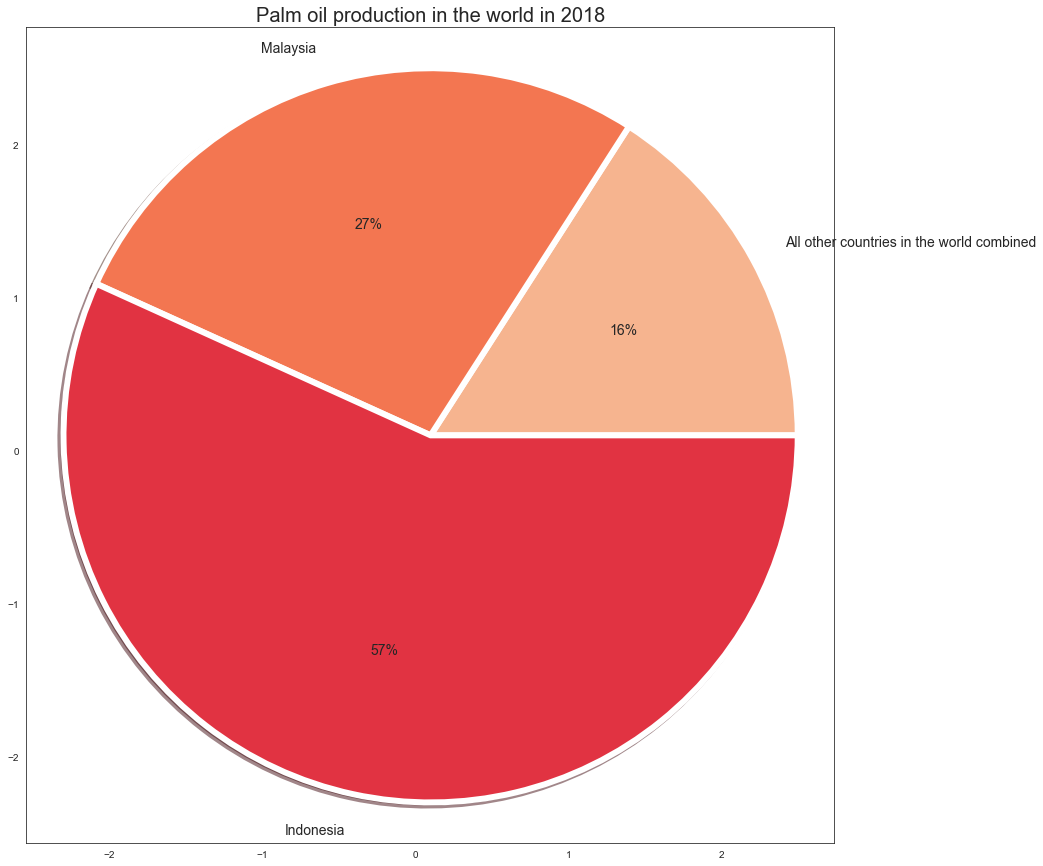

In [276]:
#define data
data = [World_2018,Malaysia_2018, Indonesia_2018]
labels = ['All other countries in the world combined','Malaysia','Indonesia']

plt.subplots(figsize=(15,15))
#define Seaborn color palette to use
colors = sns.color_palette("rocket_r")[0:5]
plt.title("Palm oil production in the world in 2018", fontsize=20)


#create pie chart
plt.pie(data, labels = labels, colors = colors, 
        autopct='%.0f%%', 
        shadow = 'True',
        #startangle = 90,
        radius = 2.4,
        textprops = {'fontsize':14},
        wedgeprops = {'linewidth': 6},
        frame = 'true' ,
        center = (0.1,0.1))

plt.show()

radius = 1.4,

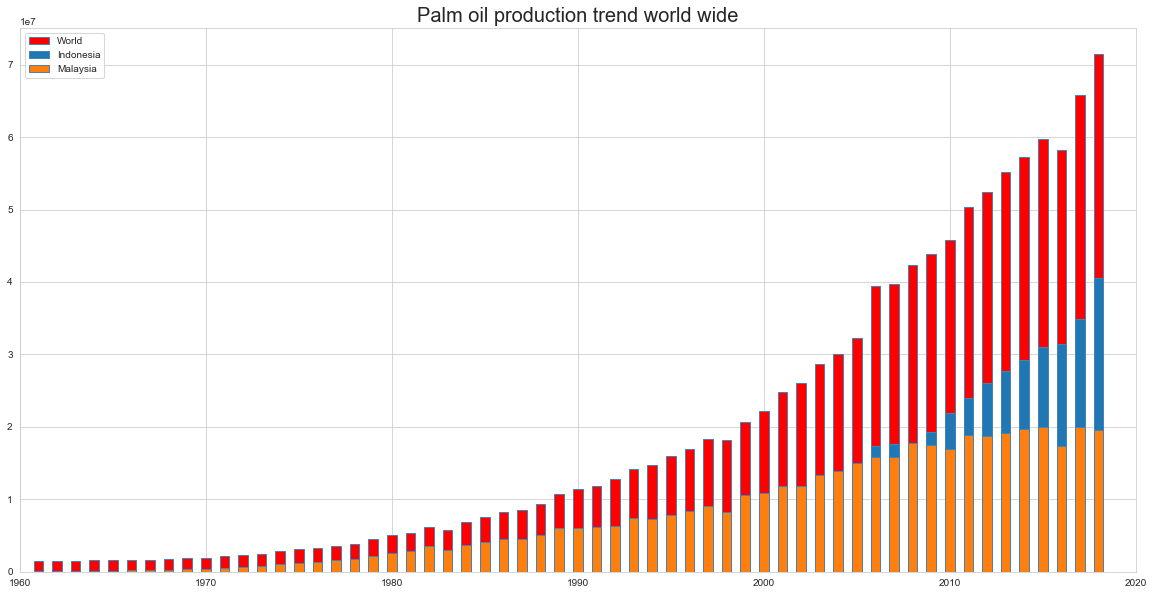

In [115]:
plt.figure(figsize=(20,10))
barWidth = 0.52
plt.title("Palm oil production trend world wide", fontsize=20)
sns.color_palette("cubehelix", as_cmap=True)
plt.bar(df_palm_world['Year'], df_palm_world['Tonnes'], width = barWidth, color='red',edgecolor='steelblue', label="World")
plt.bar(dict_of_df_palm['df_plot_Indonesia']['Year'], dict_of_df_palm['df_plot_Indonesia']['Tonnes'], width = barWidth, 
        #color='blue',
        edgecolor='steelblue', label='Indonesia')
plt.bar(dict_of_df_palm['df_plot_Malaysia']['Year'], dict_of_df_palm['df_plot_Malaysia']['Tonnes'], width = barWidth, 
        #color='green',
        edgecolor='steelblue', label ='Malaysia')
plt.xlim(xmin=1960,xmax=2020)

plt.legend(loc = 0)
plt.show()

In [252]:
China_2015 = (dict_of_df['df_plot_China'].loc[dict_of_df['df_plot_China']['Year']==2015]['Forest_Change']).values[0]
Indonesia_2015 = (dict_of_df['df_plot_Indonesia'].loc[dict_of_df['df_plot_Indonesia']['Year']==2015]['Forest_Change']).values[0]
China_2000 = (dict_of_df['df_plot_China'].loc[dict_of_df['df_plot_China']['Year']==2000]['Forest_Change']).values[0]
Indonesia_2000 = (dict_of_df['df_plot_Indonesia'].loc[dict_of_df['df_plot_Indonesia']['Year']==2000]['Forest_Change']).values[0]
China_2015 = (dict_of_df['df_plot_China'].loc[dict_of_df['df_plot_China']['Year']==2015]['Forest_Change']).values[0]
Indonesia_2015 = (dict_of_df['df_plot_Indonesia'].loc[dict_of_df['df_plot_Indonesia']['Year']==2015]['Forest_Change']).values[0]
China_2000 = (dict_of_df['df_plot_China'].loc[dict_of_df['df_plot_China']['Year']==2000]['Forest_Change']).values[0]
Indonesia_2000 = (dict_of_df['df_plot_Indonesia'].loc[dict_of_df['df_plot_Indonesia']['Year']==2000]['Forest_Change']).values[0]

Myanmar_2015 = (dict_of_df['df_plot_Myanmar'].loc[dict_of_df['df_plot_Myanmar']['Year']==2015]['Forest_Change']).values[0]
Brazil_2015 = (dict_of_df['df_plot_Brazil'].loc[dict_of_df['df_plot_Brazil']['Year']==2015]['Forest_Change']).values[0]
Myanmar_2000 = (dict_of_df['df_plot_Myanmar'].loc[dict_of_df['df_plot_Myanmar']['Year']==2000]['Forest_Change']).values[0]
Brazil_2000 = (dict_of_df['df_plot_Brazil'].loc[dict_of_df['df_plot_Brazil']['Year']==2000]['Forest_Change']).values[0]

China_1990 = (dict_of_df['df_plot_China'].loc[dict_of_df['df_plot_China']['Year']==1990]['Forest_Change']).values[0]
Indonesia_1990 = (dict_of_df['df_plot_Indonesia'].loc[dict_of_df['df_plot_Indonesia']['Year']==1990]['Forest_Change']).values[0]

Myanmar_1990 = (dict_of_df['df_plot_Myanmar'].loc[dict_of_df['df_plot_Myanmar']['Year']==1990]['Forest_Change']).values[0]
Brazil_1990 = (dict_of_df['df_plot_Brazil'].loc[dict_of_df['df_plot_Brazil']['Year']==1990]['Forest_Change']).values[0]

#World_2018 = ((df_palm_world.loc[df_palm_world['Year']==2018]['Tonnes']).values[0] - Malaysia_2018 - Indonesia_2018)

In [277]:
ls_forest={ '2015':[China_2015,Indonesia_2015,Myanmar_2015,Brazil_2015],
            '2000':[China_2000,Indonesia_2000, Myanmar_2000,Brazil_2000 ],
            '1990':[China_1990,Indonesia_1990, Myanmar_1990,Brazil_1990],
            }

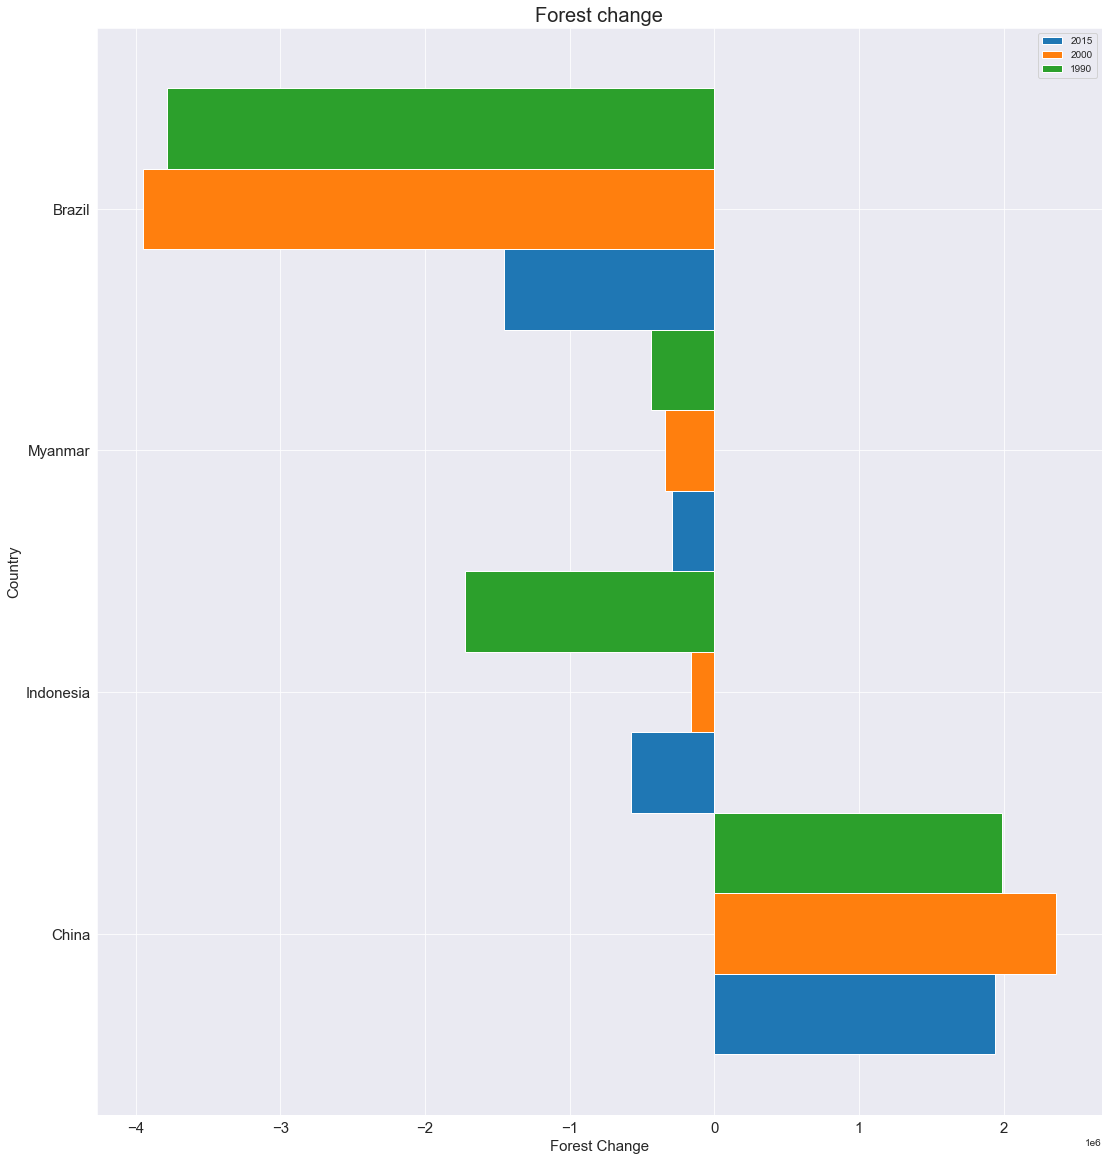

In [288]:
#plt.figure(figsize=(20,15))
#barWidth =4

sns.color_palette("crest")
sns.set_style('darkgrid')

df_a = pd.DataFrame(ls_forest,columns=['2015','2000','1990'], 
                    index = ['China','Indonesia','Myanmar','Brazil']
                   )

df_a.plot.barh(fontsize=15,width = 1, figsize=(18,20))
plt.ylabel('Country', fontsize=15)
plt.xlabel('Forest Change', fontsize=15)
plt.title("Forest change", fontsize=20)



#ax.barh(Indonesia_2015, width = barWidth,  align='center')
#plt.bar(df_palm_world['Year'], df_palm_world['Tonnes'], width = barWidth, color='red',edgecolor='steelblue', label="World")
#plt.bar(dict_of_df['df_plot_Indonesia']['Year'], dict_of_df['df_plot_Indonesia']['Forest_Change'], width = barWidth, 
        #color='blue',
#        edgecolor='steelblue', label='Indonesia')
#plt.bar(dict_of_df_palm['df_plot_Malaysia']['Year'], dict_of_df_palm['df_plot_Malaysia']['Tonnes'], width = barWidth, 
        #color='green',
#        edgecolor='steelblue', label ='Malaysia')
#plt.xlim(xmin=2017,xmax=2020)

plt.legend(loc = 0)
plt.show()

In [264]:
# plt.subplots(figsize=(20,10))
# plt.hist(df_palm_world['Tonnes'], bins=40, alpha=0.8, histtype = 'bar', color='blue',edgecolor='steelblue')
# plt.xlim(xmin=1970,xmax=2018)
# plt.show()

In [116]:
# sns.set_style('darkgrid')
# plt.figure(figsize=(20,10))
# plt.xticks(rotation = -45)
# plt.title("Palm oil production trend world wide", fontsize=20)
# sns.countplot(x= df_palm_world['Year'])
# plt.show()